# Procesamiento en el dominio epacial
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

## Librerias importadas

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 1– Explicar que diferencia hay entre el brillo y contraste. Mostrar ejemplos.

El brillo de una imagen hace referencia a los valores de intensidad de cada uno de los pixels. Mientras que el contraste se refiere a la claridad de los detalles en la imagen, por lo que se relaciona con la diferencia de instensidad de pixels consecutivos.

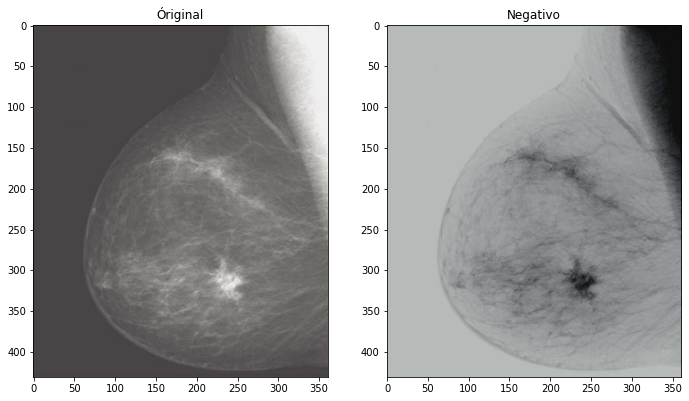


El codigo anterior muestra el caso de la transformacion negativa de una imagen.
La misma consiste en invertir los colores de la imagen (convertir claro en oscuros y vice versa).
Este es un ejemplo de una transformacion que cambia el brillo de la imagen sin afectar el contraste de la misma.



In [43]:
def NegativeTransform(img):
  return 255-img
def LogTransform(img,L=256):
  c = (L-1)/np.log2(L)
  return  c*(np.log2(img)) 
def ChangeBrightness(img,desired_brightness)
  

#Original
img = cv2.imread('mammogram.PNG')

fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
fig_img.add_subplot(121)
plt.title('Óriginal')
plt.imshow(img)

fig_img.add_subplot(122)
plt.title('Negativo')
plt.imshow(NegativeTransform(img))

plt.show()
print("\nEl codigo anterior muestra el caso de la transformacion negativa de una imagen.")
print("La misma consiste en invertir los colores de la imagen (convertir claro en oscuros y vice versa).")
print("Este es un ejemplo de una transformacion que cambia el brillo de la imagen sin afectar el contraste de la misma.\n")


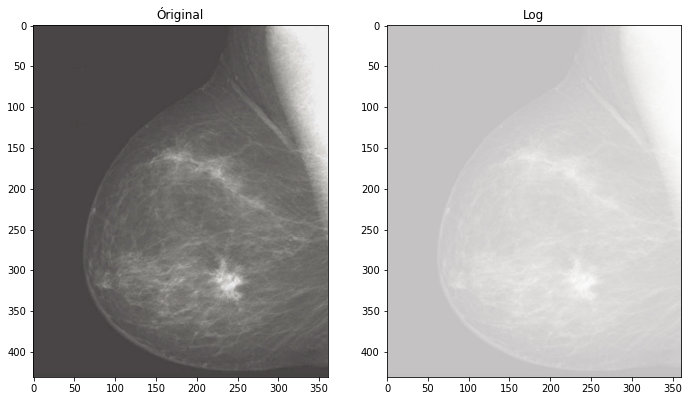

En este caso se aplica una transformacion logaritmica sobre la imagen.
La misma expande a un rango mayor los valores mas oscuros y comprime a un rango menor los mas brillantes.
Esta transformacion aumenta el brillo de la imagen y tambien disminuye el contraste de a misma


In [56]:
#Original
fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
fig_img.add_subplot(121)
plt.title('Óriginal')
plt.imshow(img)

fig_img.add_subplot(122)
plt.title('Log')
plt.imshow(LogTransform(img).astype(int))

plt.show()
print("En este caso se aplica una transformacion logaritmica sobre la imagen.")
print("La misma expande a un rango mayor los valores mas oscuros y comprime a un rango menor los mas brillantes.")
print("Esta transformacion aumenta el brillo de la imagen y tambien disminuye el contraste de a misma")

## 2 – Escribir un código que modifique el brillo y contraste de una imagen

In [74]:
def GammaTransform(img,gamma=1,L=256):
  gamma_f = float(gamma)
  c= (L-1)**(1-gamma_f)
  return (c*(img**gamma_f)).astype(int)

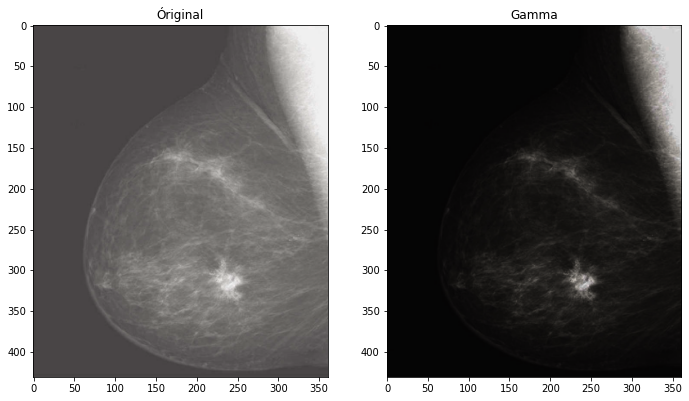

In [73]:
def PlotGammas(img, show=True):
  fig_img.add_subplot(nrows=1, ncols=4, index=1)
  plt.title('Original (gamma=1)')
  plt.imshow(img)
  for i in range(2,5):
    fig_img.add_subplot(nrows=1, ncols=4, index=1)
    gamma = 0.6/(2**(i-1))
  plt.title('Gamma='+str(gamma))
  plt.imshow(GammaTransform(img,gamma))

#Original
img2 = cv2.imread('Rodilla.PNG')
fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
PlotGammas()
fig_img.add_subplot(121)
plt.title('Original')
plt.imshow(img2)

fig_img.add_subplot(122)
plt.title('Gamma')
plt.imshow(GammaTransform(img,gamma=3))

plt.show()

In [ ]:
#Original
img = cv2.imread('bit.jpeg')
fig_img = plt.figure(figsize=(7,7))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)


def bit_slicing_n(img, n):
  new_img = np.unpackbits(np.copy(img))
  new_img = np.reshape(new_img, (img.shape[0],img.shape[1],3,-1))
  print(np.shape(new_img))
  
  for i in range(img.shape[0]):
    print(new_img[new_img[1]])
    new_img[new_img[n] == 1] = 255
    new_img[new_img[n] == 0] = 0
    #new_img[np.logical_and(new_img > 2**n-1, new_img < 2**(n+1) )] = 255
    #new_img[((new_img > 2**n-1).all() and (new_img < 2**(n+1)).all())] = 255
  return np.packbits(new_img)

new_img = bit_slicing_n(img, 7)

fig_img.add_subplot(1,2,1)
plt.title("Original")
plt.axis('off')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

fig_img.add_subplot(1,2,2)
plt.title("bit slicing")
plt.axis('off')
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)

plt.show()